# Homework 3 - data transformation & dimensionality reduction (deadline 19. 12. 2021, 23:59)

In short, the main task is to play with transformations and dimensionality reduction to obtain the best results for the linear regression model predicting house sale prices.
  
> The instructions are not given in detail: It is up to you to come up with ideas on how to fulfill the particular tasks as best you can!

However, we **strongly recommend and require** the following:
* Follow the assignment step by step. Number each step.
* Properly comment all your steps. Comments are evaluated for 2 points of the total together with the final presentation of the solution. However, it is not desirable to write novels! 
* Do not leave the task to the last minute.
* Hand in a notebook that has already been run (i.e. do not delete outputs before handing in).

## What are you supposed to do:

Your aim is to optimize the _RMSLE_ (see the note below) of the linear regression estimator (= our prediction model) of the observed sale prices.

### Instructions:

  1. Download the dataset from the [course pages](https://courses.fit.cvut.cz/MI-PDD/homeworks/index.html) (data.csv, data_description.txt). It corresponds to [this Kaggle competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). 
  1. Transform features appropriately and prepare new ones - focus on the increase in the performance of the model (possibly in combination with further steps). Split the dataset into a train and test part exactly as we did in the tutorials. Use the test part for evaluation of the influence of further steps. _(3 points)_
  1. Try to find some suitable subset of features - first without the use of PCA. _(4 points)_
  1. Use PCA (principal component analysis) to reduce the dimensionality. Discuss the influence of the number of principal components. _(4 points)_
  1. Compare the results of previous steps on the test part of the dataset. _(3 points)_
  
Give comments (!) on each step of your solution, with short explanations of your choices.

All your steps and following code **have to be commented!** Comments are evaluated for _2 points_ together with the final presentation of the solution.

**If you do all this properly, you will obtain 16 points.**

**Note**: _RMSLE_ is a Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sale prices.


## Comments

  * Please follow the technical instructions from https://courses.fit.cvut.cz/NI-PDD/homeworks/index.html.
  * If the reviewing teacher is not satisfied, she can (!) give you another chance to rework your homework and to obtain more points. However, this is not a given, so do your best! :)
  * English is not compulsory.

# Regression models on prediction of house prices

## Ekaterina Simonova - Bioinformatics, UCT Prague

In this exercise, we will work with house prices dataset. Overall, we will try to evaluate different techniques for feature selection on the preformance of regression model. Let's first load all necessary packages, the dataset and the description into the environment in order to have the idea of variables and values presented in data.

### Loading data &amp; libraries

In [ ]:
# Data handling and processing
import pandas as pd
import numpy as np

# Data visualisation 
import matplotlib.pyplot as plt

# Preprocessing data
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as ss
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif as MIC

# Machine learning algorithms
from sklearn.linear_model import LinearRegression

# Model fine-tuning and evaluation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# additional modules
import sys
import warnings

In [ ]:
# loading data description
file_d = open('data_description.txt').read()
print(file_d)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [ ]:
# loading data
df = pd.read_csv('data.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

From above we can see that this dataset contains 80 columns 1460 values. Some columns have missing values - Alley, LotFrontage, BsmtQual etc. From above we can also see that the column Id is useless so we can set it as the index for data.

In [ ]:
df = df.set_index("Id")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Let's look at columns which have null values and evaluate the proportion of missing values. We will drop all columns that have more than around 50 % of null values. If I fill values in such columns with the most frequent value I may change the interpretation of the data completely or bring a huge bias/error to the model.

In [ ]:
# checking which columns have null values
null_cols = df.columns[df.isna().any()].tolist()
df[null_cols].isin([' ','NULL',np.nan]).mean()

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

From above we can see that columns Alley, FireplaceQu, PoolQC, Fence, MiscFeature do contain a high proportion of nulls. I will drop these columns before further preprocessing.

In [ ]:
df = df.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis=1)

### Data Exploration

Before we start with data processing and standardization, let's explore our data a little bit more. Let's select features with Nulls and fill them with most frequent value. Let's first have a look on which variables correlate the most with the variable we will predict (SalePrice). As we have 80 columns in the data set, let's first subset some (int and float) and perform the correlation.

In [ ]:
# detecting columns with nan
corr_df = df.copy()
corr_df = corr_df.select_dtypes(include=['float64', "int64"])
nan_values = corr_df.columns[corr_df.isna().any()].tolist()
nan_values

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [ ]:
# replacing NaN with median
corr_df = corr_df.apply(lambda x: x.fillna(x.value_counts().index[0]))

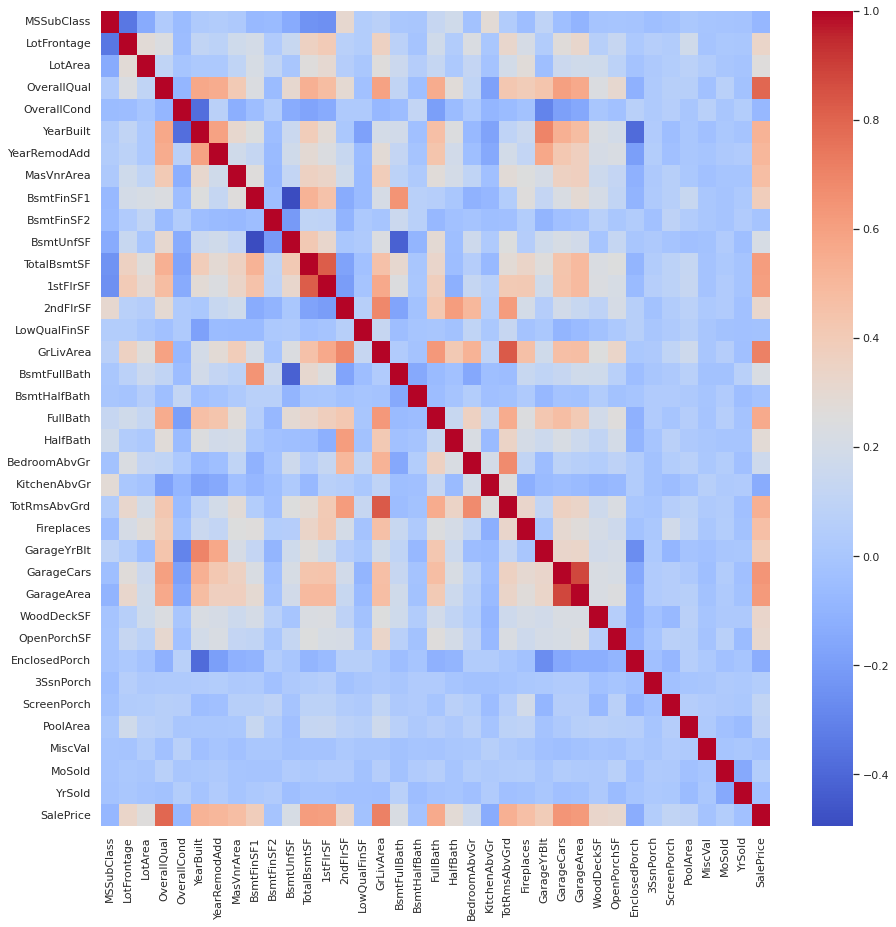

In [ ]:
# drawing heatmap
sns.set(rc={'figure.figsize':(15,15)})
corr_df = corr_df.corr()
corr_matrix=sns.heatmap(corr_df, cmap = "coolwarm")

From above we can see that between variables that highly correlate with SalesPrice GarageCars & GarageArea (these too variables have very high correlation to each other), FullBath, GrLivArea, 1stFlrSF, TotalBsmtSf and OverallQual. We can also notice that TotalBsmtSfhighly correlates to 1stFlrSF.

Let's now also look at object variables. These variables are categorical, so we would need to preprocess them in order to access the correlation values. For that, let's use Cramer's coefficient. The function was taken from this [article](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9). If Cramer's coefficient is equal to 0 means no association between variables and 1 is full association. (Unlike correlation, there are no negative values, as there’s no such thing as a negative association. I haven't used this technique before, however we might not be interested in features that have have high assosiation between each other, which means as in case of correlation that they bring the same information.

In [ ]:
# the function used to calculate cramers coefficient
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

At this step, we will select columns with NULL values to replace them with the most frequent value.

In [ ]:
# selecting columns with nulls
obj_df = df.select_dtypes(include=["object"])
nan_values_obj = obj_df.columns[obj_df.isna().any()].tolist()
nan_values_obj

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [ ]:
# NaN values replacement with the most frequent values
obj_df = obj_df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [ ]:
# select the target and check the shape of data
obj_df['SalePrice'] = df.SalePrice
obj_df.shape

(1460, 39)

In [ ]:
# calculation cramers values to generate assosiation matrix
import warnings
warnings.filterwarnings('ignore')

cramers_vals = np.zeros(shape=(len(obj_df.columns), len(obj_df.columns)))
for x, x_col in enumerate(obj_df.columns):
    for y, y_col in enumerate(obj_df.columns):
        cramers_vals[x][y] = cramers_v(obj_df[x_col],obj_df[y_col])


cramers_vals

array([[1.        , 0.24938428, 0.15219083, ..., 0.15090267, 0.13606503,
        0.29244056],
       [0.24938428, 0.91626277, 0.0337698 , ..., 0.11088637, 0.09945753,
        0.39345168],
       [0.15219083, 0.0337698 , 1.        , ..., 0.        , 0.00192302,
        0.32400872],
       ...,
       [0.15090267, 0.11088637, 0.        , ..., 1.        , 0.47081876,
        0.26245943],
       [0.13606503, 0.09945753, 0.00192302, ..., 0.47081876, 1.        ,
        0.29624737],
       [0.29244056, 0.39345168, 0.32400872, ..., 0.26245943, 0.29624737,
        1.        ]])

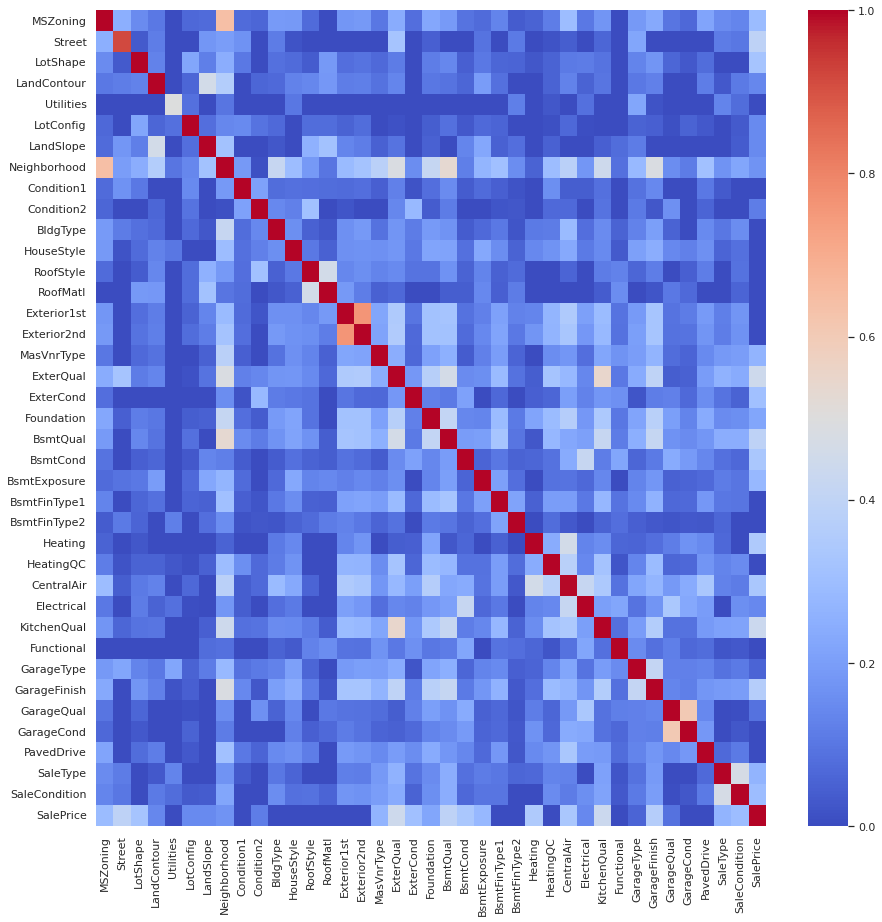

In [ ]:
# plotting assosiation matrix
assosiation_df = pd.DataFrame(cramers_vals, index=obj_df.columns, columns=obj_df.columns)
assosiation_matrix=sns.heatmap(assosiation_df, cmap = "coolwarm")

### Feature selection Correlation &amp; Association analysis

Let's perform feature selection based on correlation & association, two step preprocessing:
1) remove all features with correlation > |0.8| (for dtypes integer and float)
2) remove all features with assosiation value over 0.6 (for categorical variables)

In [ ]:
# filtering unnecessary columns with correlation or assosiation mask
corr_df = corr_df.drop("SalePrice", axis=1)
assosiation_df = assosiation_df.drop("SalePrice", axis=1)
corr_mask = np.triu(np.ones_like(corr_df, dtype=bool))
assosiation_mask = np.triu(np.ones_like(assosiation_df, dtype=bool))
corr_df_masked = corr_df.mask(corr_mask)
assosiation_df_masked = assosiation_df.mask(assosiation_mask)
to_drop_1 = [c for c in corr_df_masked.columns if any(abs(corr_df_masked[c]) >= 0.8)]
to_drop_2 = [c for c in assosiation_df_masked.columns if any(assosiation_df_masked[c] >= 0.6)]

# printing out the number of columns to remove
print(f"The number of columns to drop (int & float): {len(to_drop_1)} out of {len(corr_df.columns)}")
print(f"The number of columns to drop (categorical): {len(to_drop_2)} out of {len(assosiation_df.columns)}")

The number of columns to drop (int & float): 3 out of 36
The number of columns to drop (categorical): 3 out of 38


In [ ]:
# dropping unnecessary columns
to_drop = to_drop_1 + to_drop_2

# separationg features from target variable
coras_df = df.copy()
coras_df = coras_df.apply(lambda x:x.fillna(x.value_counts().index[0]))
coras_df = coras_df.drop(to_drop, axis=1)

# converting categorical variables into dummies
X_coras = coras_df.drop("SalePrice", axis=1)
y_coras = df.SalePrice
X_coras_dummies = pd.get_dummies(X_coras)


print(X_coras_dummies.shape)

(1460, 242)


In [ ]:
# train test split for data preprocessed via correlation or assosiation
X_train_corr_fs, X_test_corr_fs, y_train_corr_fs, y_test_corr_fs = train_test_split(X_coras_dummies, y_coras, test_size=0.30, random_state=5)

From above we can see that we removed 6 features from the model, which may help or not our model to perform better. With correlation & assosiation analysis we reduced the number to features to 68.

### Mutual Information Feature Selection

Let's also try to perform Mutual Information feature selection on our data. Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency. There was no a specific reason why I selected 0.2 as a cutoff for the analysis, I just noticed that it was used in the other tutorial. The best solution would be to select a range of cutoffs and keep the one which would work the best for our dataset.

In [ ]:
# calculation scores per each feature
mic_df = df.copy()
mic_df = mic_df.apply(lambda x:x.fillna(x.value_counts().index[0]))
mic_df_dummies = pd.get_dummies(mic_df)
y_mic = mic_df["SalePrice"]
X_mic = mic_df_dummies.drop("SalePrice", axis=1)
mi_score = MIC(X_mic,y_mic)
print(mi_score)

[2.14410927e-01 2.33489456e-01 1.30174657e-01 7.87588550e-01
 4.37547338e-01 2.93874415e-01 2.34563436e-01 1.16493545e-01
 8.17068302e-02 0.00000000e+00 1.62613364e-02 2.30960074e-01
 1.60414926e-01 1.19487262e-01 0.00000000e+00 3.85870080e-01
 4.21452687e-01 3.35657366e-02 2.60937818e+00 5.23000072e-01
 5.55292953e-01 3.73827812e+00 4.25759883e-01 9.31780758e-01
 1.65187743e-01 2.09252940e+00 2.90660398e-01 1.16227212e-01
 1.81864959e-01 0.00000000e+00 0.00000000e+00 4.72100510e-02
 0.00000000e+00 1.33555024e-02 0.00000000e+00 1.86198759e-01
 0.00000000e+00 0.00000000e+00 1.25116217e-02 2.42324533e+00
 1.09900026e-01 2.38566402e-03 4.03309830e+00 2.38660491e-01
 1.83036610e-02 1.07977675e-02 1.63526678e+00 0.00000000e+00
 2.60591706e-02 0.00000000e+00 3.20432130e+00 3.90954913e+00
 0.00000000e+00 3.33909603e-02 0.00000000e+00 6.53956846e-03
 0.00000000e+00 1.74564831e+00 3.51135869e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.76560908e-03 0.000000

In [ ]:
# select only features with mi_score above 0.2
mi_score_selected_index = np.where(mi_score > 0.2)[0]
print("The number of selected features with Mutual Information Method: ", len(mi_score_selected_index))
mi_score_selected_index

The number of selected features with Mutual Information Method:  66


array([  0,   1,   3,   4,   5,   6,  11,  15,  16,  18,  19,  20,  21,
        22,  23,  25,  26,  39,  42,  43,  46,  50,  51,  57,  58,  88,
        97, 103, 110, 113, 117, 123, 142, 158, 162, 163, 167, 168, 173,
       175, 176, 182, 183, 187, 191, 194, 197, 203, 205, 210, 214, 216,
       221, 224, 225, 232, 234, 238, 239, 240, 241, 246, 251, 254, 263,
       268])

In [ ]:
# preprocessing X for a predictive model
X_mic_selected = X_mic.iloc[:,mi_score_selected_index]

In [ ]:
# splitting data to train and test for data preprocessed via mutual information feature selection
X_train_mic, X_test_mic, y_train_mic, y_test_mic = train_test_split(X_mic_selected,y_mic,random_state=5)

As we can see from above with Mutual information feature selection we reduced the number of features to 66. 

### Feature selection - PCA

Let's now try to use PCA in order to select the best feature for our model.

To process data with PCA we first consdider two rules:

1) we should standardize the data before using PCA (we will preprocess data with MinMaxScaler)
2) PCA is used only on the train data

To preprocess the data for PCA let's first tranform all categorical variables to dummies variables, then let's apply MinMaxScaler to stadardize the data. As some variables contain NaN values I will also use Imputer to fill NaNs with the most frequent value.

The final number of features of X_dummies dataframe 270


Text(0, 0.5, 'RMSLE')

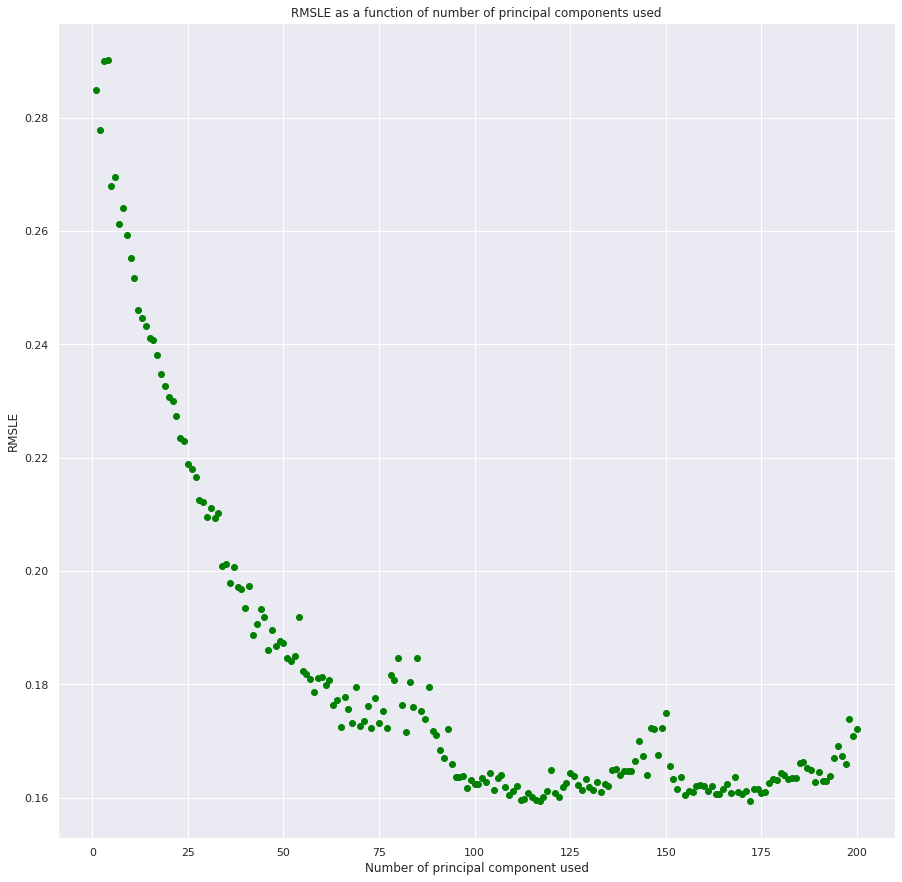

In [ ]:
# separation predicting variable and features
pca_df = df.copy()
y = pca_df["SalePrice"]
X = pca_df.drop(["SalePrice"], axis = 1)
X_dummies = pd.get_dummies(X)

# returning the total number of features
print("The final number of features of X_dummies dataframe",X_dummies.shape[1])

# splitting data to train and test
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.30, random_state=5)

# calculation RMSLE for different number of principal components
i, rmsle_vals  = 0, {}
while i < 200:
    i += 1
    # defining a pipeline used for preprocessing of data
    pipeline = Pipeline([("imputer", SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('scaling', MinMaxScaler()),
    ('pca', PCA(n_components=i, whiten=True)),
    ('linreg', LinearRegression())])
    
    pipeline.fit(X_train, y_train)
    y_test_pred = pipeline.predict(X_test)
    # adding RMSLE to dictionary
    rmsle_vals[i] = np.sqrt(mean_squared_error(np.log(y_test), np.log(y_test_pred)))
    
# plotting RMSE as a function of number of principal components used
plt.scatter(rmsle_vals.keys(), rmsle_vals.values(), c='green')
plt.title("RMSLE as a function of number of principal components used")
plt.xlabel('Number of principal component used')
plt.ylabel('RMSLE')

I could iterate over all 288 features, however I decided to set 200 as a cutoff for all possible principal components.

Let's find out how many features we would keep to have the smallest RMSLE.

In [ ]:
min_rmse = min(rmsle_vals, key=rmsle_vals.get)

print(f'The smallest RMSLE was detected for {min_rmse} features, which was {rmsle_vals[min_rmse]}.')

The smallest RMSLE was detected for 127 features, which was 0.15895647373262825.


From above we can see that the lowest RMSLE was observed for 127 features. Overall we can see that by the increasing the number of features RMSLE is decreasing. However we can see 3 peaks one is around 80 features, the secons is around 150 features and the third one is around 200.

In [ ]:
# preprocessing of data for PCA
df_pca = df.copy()
df_pca = df_pca.apply(lambda x:x.fillna(x.value_counts().index[0]))
df_pca_dummies = pd.get_dummies(df_pca)
y_pca = df_pca["SalePrice"]
X_pca_dummies = df_pca_dummies.drop("SalePrice", axis=1)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_dummies, y_pca, test_size=0.30, random_state=5)

# scaling and preprocessing of data
sc = MinMaxScaler()
pca = PCA(n_components=min_rmse)

X_train_pca = sc.fit_transform(X_train_pca)
X_train_pca = pca.fit_transform(X_train_pca)

X_test_pca = sc.transform(X_test_pca)
X_test_pca = pca.transform(X_test_pca)


### No preprocessing

Let's also preprocess the data to confirm how much better/worse the performance of preprocessed data compare to data which were not preprocessed for the modelling.

In [ ]:
# no preprocessing
df_nopre = df.copy()
df_nopre = df_nopre.apply(lambda x:x.fillna(x.value_counts().index[0]))
df_nopre_dummies = pd.get_dummies(df_nopre)
y_nopre = df_nopre["SalePrice"]
X_nopre = df_nopre_dummies.drop("SalePrice", axis=1)

imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer.fit(X_nopre)
X_nopre=imputer.transform(X_nopre)

X_train_nopre, X_test_nopre, y_train_nopre, y_test_nopre = train_test_split(X_nopre, y_nopre, test_size=0.30, random_state=5)


### Influence of the feature selection method on the regression modeling

Let's now see which feature selection method worked the best for our dataset.

In [ ]:
# defining a function to evaluate the performance
def run_lenreg_eval(preprocessing, X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    rmsle_val = round(np.sqrt(mean_squared_error(np.log(y_test), np.log(y_test_pred))),3)
    return f'RMSLE value for data preparation with {preprocessing}: {rmsle_val}'

In [ ]:
# No preprocessing 
print(run_lenreg_eval("No preprocessing", X_train_nopre, X_test_nopre, y_train_nopre, y_test_nopre))

RMSLE value for data preparation with No preprocessing: 0.151


In [ ]:
# Correlation & Assosiation analysis
print(run_lenreg_eval("Correlation & Assosiation analysis", X_train_corr_fs, X_test_corr_fs, y_train_corr_fs, y_test_corr_fs))

RMSLE value for data preparation with Correlation & Assosiation analysis: 0.149


In [ ]:
# Mutual information
print(run_lenreg_eval("Mutual Information", X_train_mic, X_test_mic, y_train_mic, y_test_mic))

RMSLE value for data preparation with Mutual Information: 0.164


In [ ]:
# PCA
print(run_lenreg_eval("PCA", X_train_pca, X_test_pca, y_train_pca, y_test_pca))

RMSLE value for data preparation with PCA: 0.165


### Summary &amp; Discussion

* In this analysis, I used 3 feature selection methods, namely Correlation & Assosiation analysis, Mutual information scoring and PCA
* All null values in the dataset were always filled with the most frequent value - for both categorical and numerical columns
* I could also use mean or median to fill in numerical variables which might improve the model or have a different influence on the model performance
* All categorical variables were one-hot encoded with pandas dummies function
* For PCA different number of features was tested in order to select the most appropriate number of features
* To evaluate the performance of the model I used RMSLE 
* Overall the RMSLE value for all features selection methods was around 0.15-0.18
* Correlation & Assosiation analysis showed the lowest RMSE compare to other methods used in this analysis, however the difference to unprocessed data was insignificant
* PCA and Mutual Information feature selection performed relatively the same and worse compare to unprocessed data and correlation & assosiation analysis 
* Moreover, the possible reason for the low performance of mutual information of feature selection method is that is not frequently used to select features for regressions models, it is more likely used for classification, a better option which I could select for feature selection for this dataset are Stepwise Regression,
Forward Selection or Backward Elimination.

However, some authors previosly discussed the use of mutual information for regression models in the paper https://www.sciencedirect.com/science/article/abs/pii/S0893608013001883,and concluded that under some reasonable assumptions, features selected with the mutual information criterion are the ones minimising the mean squared error and the mean absolute error.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4533eb3c-58b2-435b-a508-5317de453516' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>